In [2]:
import numpy as np
import csv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from os import listdir
        
# content = content.decode('utf-8')         



# test_data = np.genfromtxt('./data_export_cobercat/data_export_1-2015.csv',skip_header=1,delimiter=',', dtype=None, names=['timestamp','date','lat','lng','signal_inst','signal_min','signal_max','signal_avg','carrier','fullCarrier','status','net','net_type','lac','cid','psc','speed,satellites','precision1','provider','activity','incident','downloadSpeed','uploadSpeed'],filling_values=(-1))

In [3]:
class cell_user:
    '''Holds data for each user'''
    
    def __init__(self, inpu):
        self.timestamp = int(inpu[0])
        self.date = inpu[1]
        self.lat = float(inpu[2])
        self.lng = float(inpu[3])
        self.signal_inst = int(inpu[4])
        self.signal_min = int(inpu[5])
        self.signal_max = int(inpu[6])
        self.signal_avg = int(inpu[7])
        self.carrier = unicode(inpu[8])
        self.fullCarrier = unicode(inpu[9])
        self.status = int(inpu[10])
            
#         self.status = int(inpu[10])
        self.net = int(inpu[11])
        self.net_type = inpu[12]
        self.lac = int(inpu[13])
        self.cid = int(inpu[14])
        self.psc = int(inpu[15])
        self.speed = float(inpu[16])
        self.satellites = int(inpu[17])
        self.precision1 = int(inpu[18])
        self.provider = inpu[19]
        self.activity = int(inpu[20])
        try:
            self.incident = inpu[21]
            if len(self.incident) == 0:
                self.incident = -1
            
        except:
            self.incident = -1
            
        try:
            self.downloadSpeed = inpu[22]
            self.uploadSpeed = inpu[23]
            
        except:
            self.downloadSpeed = -1
            self.uploadSpeed = -1
        
        
        
    def __str__(self):
        '''return the name upon str(object)'''
        return str(self.timestamp)


In [4]:
def average_attr(list_of_phones, attr):
    """averages that attribute in the list"""
    total = 0
    n = 0
    for x in list_of_phones:
        try:
            total += float(getattr(x, attr))
            n += 1
        
        except:
            pass
    
    average = total/float(n)

    return average
    

In [5]:
def keys_and_incidences(list_of_phones, attr):
    """finds each key and the nuber of incidences"""
    key_incid = {}
    for x in list_of_phones:
        label = getattr(x, attr)
        try:
            key_incid[label] += 1
        
        except:
            key_incid[label] = 1
    


    return key_incid

In [16]:
unix = "./data_export_cobercat/data_export_1-2015.csv"

phone_data = open(unix, "r")
phone_data_reader = csv.reader(phone_data, delimiter=',')
phone_data_list = list(phone_data_reader)
list_of_phone_data = []
error_entries = []

for x in phone_data_list[1:]:
    try:
        y = cell_user(x)
        list_of_phone_data.append (y)
    except:
        error_entries.append(str(x))
        
        
print list_of_phone_data[-1]
print len(error_entries)/float(len(list_of_phone_data))

1448865682652
0.00389511303859


In [7]:
for x in list_of_phone_data[-10:-5]:
    print x.uploadSpeed

In [8]:
sum = 0
count = 0
for x in list_of_phone_data:
    sum += float(getattr(x, "speed"))
    count += 1

In [9]:
print sum/count

26.1372163996


In [10]:
len(list_of_phone_data)

99612

In [11]:
print average_attr(list_of_phone_data, "precision1")

22.2305143959


In [12]:
k_c= keys_and_incidences(list_of_phone_data,'fullCarrier')

([<matplotlib.axis.XTick at 0x1257522d0>,
 <a list of 30 Text xticklabel objects>)

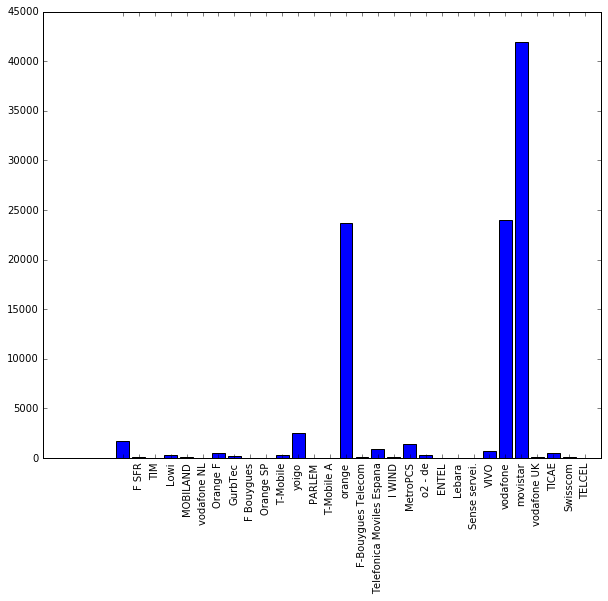

In [13]:
# plt.plot(k_c)

plt.bar(range(len(k_c)), k_c.values(), align='center')
plt.xticks(rotation=90)
plt.xticks(range(len(k_c)), k_c.keys())



In [14]:
print (k_c.values)



<built-in method values of dict object at 0x107face88>
